<a href="https://colab.research.google.com/github/dhiru234/projectand-normal-deep-learning-and-machine-learning/blob/main/brats2dclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import the necessary library**

In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ensure TensorFlow version compatibility
print(tf.__version__)


2.15.0


**defining a directory**

In [ ]:
# Define directories
trainyes_directory = '/content/drive/MyDrive/dataset/train/yes'
trainno_directory = '/content/drive/MyDrive/dataset/train/no'
test_directory = '/content/drive/MyDrive/dataset/test'
valyes_directory = '/content/drive/MyDrive/dataset/valid/yes'
valno_directory = '/content/drive/MyDrive/dataset/valid/no'

**creating a image data generator with data augmentation**

In [ ]:


# Define image data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/valid',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


**Building the 2d cnn base model**

In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

**Training the model**

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=3
)


Epoch 1/3
87/87 [==============================] - 946s 11s/step - loss: 0.7016 - accuracy: 0.6210 - val_loss: 0.6658 - val_accuracy: 0.6094
Epoch 2/3
87/87 [==============================] - 21s 244ms/step - loss: 0.5806 - accuracy: 0.6915 - val_loss: 0.6331 - val_accuracy: 0.7396
Epoch 3/3
87/87 [==============================] - 21s 240ms/step - loss: 0.5602 - accuracy: 0.7106 - val_loss: 0.6224 - val_accuracy: 0.6875


In [ ]:
# Save the model
model.save('my_cnn_model.h5')


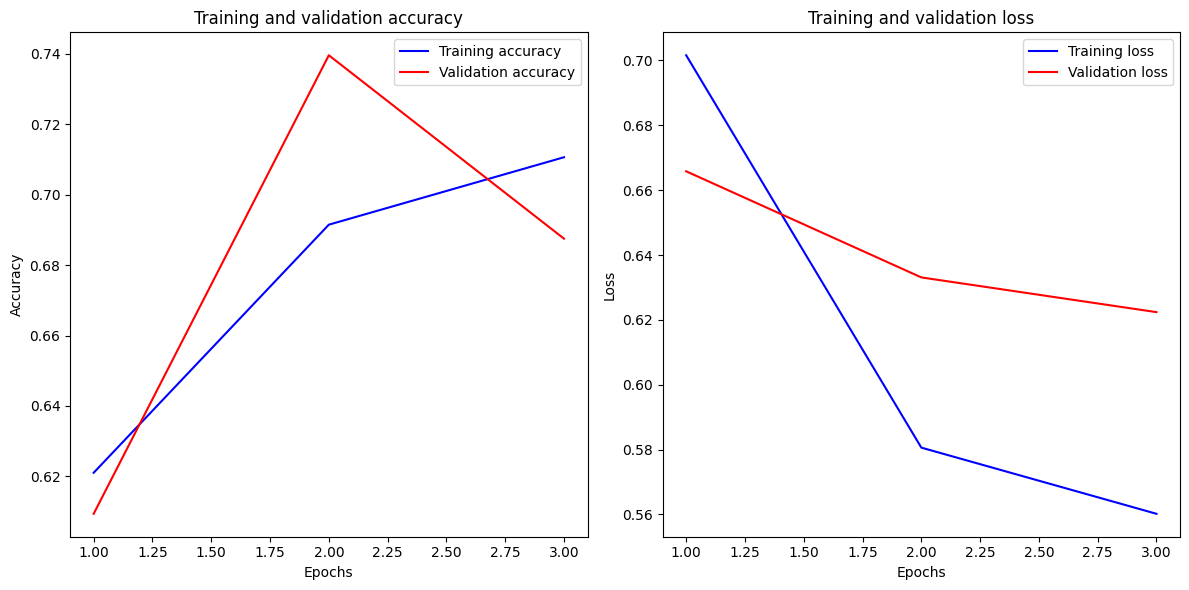

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
